# IBM Coursera Capstone project - Car Collision Severity Prediction

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline

###### Exploratory Data Analysis

In [3]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
#import/read in the dataset as df dataframe
df = pd.read_csv('Data-Collisions.csv')

C:\Users\ElaheSloss\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#take a look at the data
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df['JUNCTIONTYPE'].unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', nan,
       'Unknown', 'Ramp Junction'], dtype=object)

In [7]:
df['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

In [8]:
df['ROADCOND'].unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [9]:
df['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

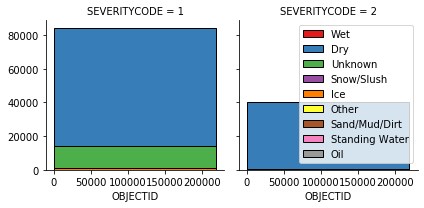

In [10]:
df_RC = df[['ROADCOND', 'SEVERITYCODE', 'OBJECTID']]
df_RC_group = df_RC.groupby(['ROADCOND','SEVERITYCODE'],as_index=False).count()

bins = np.linspace(df.OBJECTID.min(), df.OBJECTID.max(), 2)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="ROADCOND", palette="Set1", col_wrap=2)
g.map(plt.hist, 'OBJECTID', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

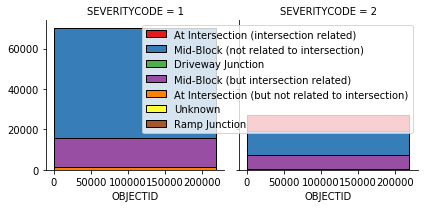

In [11]:
df_JT = df[['JUNCTIONTYPE', 'SEVERITYCODE', 'OBJECTID']]
df_JT_group = df_JT.groupby(['JUNCTIONTYPE','SEVERITYCODE'],as_index=False).count()

bins = np.linspace(df.OBJECTID.min(), df.OBJECTID.max(), 2)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="JUNCTIONTYPE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'OBJECTID', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

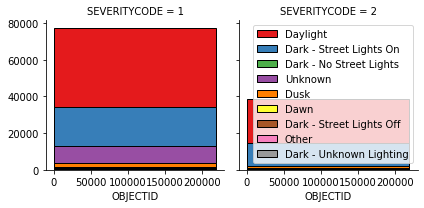

In [12]:
df_LC = df[['LIGHTCOND', 'SEVERITYCODE', 'OBJECTID']]
df_LC_group = df_LC.groupby(['LIGHTCOND','SEVERITYCODE'],as_index=False).count()

bins = np.linspace(df.OBJECTID.min(), df.OBJECTID.max(), 2)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="LIGHTCOND", palette="Set1", col_wrap=2)
g.map(plt.hist, 'OBJECTID', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

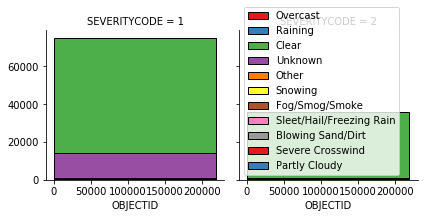

In [13]:
df_W = df[['WEATHER', 'SEVERITYCODE', 'OBJECTID']]
df_W_group = df_W.groupby(['WEATHER','SEVERITYCODE'],as_index=False).count()

bins = np.linspace(df.OBJECTID.min(), df.OBJECTID.max(), 2)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="WEATHER", palette="Set1", col_wrap=2)
g.map(plt.hist, 'OBJECTID', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [14]:
#how many elements with nulls for each 37 attribute
#JunctionType has 6329 missing values, Weather 5081, ROADCOND 5012, LIGHTCOND 5170, COLLISIONTYPE 4904, ADDRTYPE 1926
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [15]:
#Create a new df with features with possible role in prediction of collision severity
df2 = df[['SEVERITYCODE', 'STATUS', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', \
            'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', \
          'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR']]

In [16]:
#Unmatched records are concerning as to validity and may be a good idea to remove
df2.groupby('STATUS').size()


STATUS
Matched      189786
Unmatched      4887
dtype: int64

In [17]:
#Delete unmatched records as it's a small percentage of overall records
df2 = df2[df2.STATUS != "Unmatched"]
df2.groupby('STATUS').size()

STATUS
Matched    189786
dtype: int64

In [18]:
#Delete Nan missing values for these attributes
df2 = df2.dropna(axis = 0, subset=['JUNCTIONTYPE'])
df2 = df2.dropna(axis = 0, subset=['COLLISIONTYPE'])
df2 = df2.dropna(axis = 0, subset=['ST_COLCODE'])
df2 = df2.dropna(axis = 0, subset=['LIGHTCOND'])
df2 = df2.dropna(axis = 0, subset=['ROADCOND'])
df2 = df2.dropna(axis = 0, subset=['WEATHER'])

In [19]:
#Regroup Unknown/Other values all together
df2['LIGHTCOND'].replace(['Other', 'Unknown'], 'Unknown/Other', inplace=True)
df2['ROADCOND'].replace(['Unknown', 'Other'],'Unknown/Other', inplace = True)
df2['WEATHER'].replace(['Unknown', 'Other'], 'Unknown/Other', inplace = True)

In [20]:
#transform dependent variable for classification
df2['SEVERITYCODE'] = df2['SEVERITYCODE'].replace([1,2],[0,1])

In [21]:
#Transform Inattention Ind (Y/Null to 0/1 dummy variables)
df2['INATTENTIONIND'] = df2['INATTENTIONIND'].replace(np.nan, 0)
df2['INATTENTIONIND'] = df2['INATTENTIONIND'].replace("Y", 1)
df2.groupby('INATTENTIONIND').size()

INATTENTIONIND
0    153935
1     29239
dtype: int64

In [22]:
#Transform DUI (0/1/N/Y to 0/1)
df2['UNDERINFL'] = df2['UNDERINFL'].replace(['0','N'],0)
df2['UNDERINFL'] = df2['UNDERINFL'].replace(['1','Y'],1)
df2.groupby('UNDERINFL').size()

UNDERINFL
0    174172
1      9002
dtype: int64

In [23]:
#Transform Pedestrian Right Of Way Not Granted indicator from Y/null to 0/1
df2['PEDROWNOTGRNT'] = df2['PEDROWNOTGRNT'].replace(np.nan, 0)
df2['PEDROWNOTGRNT'] = df2['PEDROWNOTGRNT'].replace("Y", 1)
df2.groupby('PEDROWNOTGRNT').size()

PEDROWNOTGRNT
0    178526
1      4648
dtype: int64

In [24]:
#Transform speeding indicator from Y/Null to 0/1
df2['SPEEDING'] = df2['SPEEDING'].replace(np.nan, 0)
df2['SPEEDING'] = df2['SPEEDING'].replace("Y", 1)
df2.groupby('SPEEDING').size()

SPEEDING
0    173965
1      9209
dtype: int64

In [25]:
#Transform Hit Parked Car indicator from N/Y to 0/1
df2['HITPARKEDCAR'] = df2['HITPARKEDCAR'].replace("N", 0)
df2['HITPARKEDCAR'] = df2['HITPARKEDCAR'].replace("Y", 1)
df2.groupby('HITPARKEDCAR').size()

HITPARKEDCAR
0    177440
1      5734
dtype: int64

In [26]:
df2.head()

,SEVERITYCODE,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,1,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,0,Overcast,Wet,Daylight,0,0,10,0
1,0,Matched,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,0,Raining,Wet,Dark - Street Lights On,0,0,11,0
2,0,Matched,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,0,Overcast,Dry,Daylight,0,0,32,0
3,0,Matched,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,0,0,Clear,Dry,Daylight,0,0,23,0
4,1,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,0,Raining,Wet,Daylight,0,0,10,0


In [27]:
#Shows Imbalanced Dataset
df2.groupby('SEVERITYCODE').size()

SEVERITYCODE
0    126518
1     56656
dtype: int64

In [28]:
 #Address imbalanced dataset by Downsampling Majority Class To Match Minority Class
from sklearn.utils import resample

df2_major = df2[df2.SEVERITYCODE == 0]
df2_minor = df2[df2.SEVERITYCODE == 1]
# Number of observations in each class
n_df2_major = len(df2_major); print(); print("n_df2_major: ", n_df2_major)
n_df2_minor = len(df2_minor); print(); print("n_df2_minor: ", n_df2_minor)


n_df2_major:  126518

n_df2_minor:  56656


In [29]:
# For every observation of class 0, randomly sample from class 1 without replacement
df2_major_downsampled = resample(df2_major, 
                                 replace=False,    # sample without replacement
                                 n_samples=56656,     # to match minority class
                                 random_state=100) # reproducible results
 
# Combine minority class with downsampled majority class
df3 = pd.concat([df2_major_downsampled, df2_minor])
 
# Display new class counts
df3.SEVERITYCODE.value_counts()

1    56656
0    56656
Name: SEVERITYCODE, dtype: int64

In [30]:
#Separate out all relevant independent variables and create a couple feature sets to normalize
fdf3 = df3[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INATTENTIONIND', 'UNDERINFL','PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR']]

In [31]:
#Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature dataframe
fdf3 = pd.concat([fdf3, pd.get_dummies(df3[['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER','ROADCOND', 'LIGHTCOND', 'SDOT_COLCODE', 'ST_COLCODE']])], axis = 1)

In [32]:
X = preprocessing.StandardScaler().fit(fdf3).transform(fdf3)
X[0:5]

array([[ 3.14171085e-01, -2.39448134e-01, -2.15199264e-01,
         1.71932565e+00, -4.45701926e-01, -2.35539736e-01,
        -2.00806307e-01,  4.21539886e+00, -1.58912301e-01,
        -1.10659252e-01, -3.24237838e-02,  7.94295126e-01,
        -7.90384625e-01, -5.04293154e-01, -2.14900569e-01,
        -1.11198435e-01, -2.96384776e-01, -3.68263982e-01,
        -4.72911490e-01, -2.39561571e-01,  1.97242536e+00,
        -1.20282340e-01, -3.04658682e-01, -1.07310741e-01,
        -7.71435290e-01, -2.45981870e-01, -3.75444249e-01,
         1.14198062e+00, -3.00163369e-02, -5.14550997e-03,
        -1.65425444e-02,  8.07208660e-01, -5.77002536e-02,
        -4.19083297e-01, -6.64288343e-03, -4.74308032e-01,
        -8.91252067e-03, -2.35859344e-02, -6.63064062e-02,
        -2.36165190e-01,  6.91176977e-01, -7.81589552e-02,
        -1.90253459e-02, -2.01525095e-02, -6.80299189e-02,
        -2.46841890e-02, -2.28335311e-01, -5.95330519e-01,
        -8.63169208e-02, -7.81017862e-02, -5.89308336e-0

In [33]:
fdf3.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,SDOT_COLCODE,...,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_8,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,ST_COLCODE_85,ST_COLCODE_87,ST_COLCODE_88
180414,3,0,0,3,0,0,0,1,0,14,...,0,0,0,0,0,0,0,0,0,0
17083,2,0,0,2,0,0,0,0,0,16,...,0,0,0,0,0,0,0,0,0,0
25131,2,0,0,2,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,0
130792,5,0,0,2,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0
33027,2,0,0,2,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Second set of independent variables are commonly known factors impacting collisions
f2df3 = df3[['INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR']]

In [35]:
f2df3 = pd.concat([f2df3, pd.get_dummies(df3[['ADDRTYPE', 'JUNCTIONTYPE', 'WEATHER','ROADCOND', 'LIGHTCOND']])], axis = 1)

In [36]:
X2 = preprocessing.StandardScaler().fit(f2df3).transform(f2df3)
X2[0:5]

array([[-0.44570193, -0.23553974, -0.20080631,  4.21539886, -0.1589123 ,
        -0.03242378,  0.79429513, -0.79038463, -0.10731074, -0.77143529,
        -0.24598187, -0.37544425,  1.14198062, -0.03001634, -0.00514551,
        -0.01654254,  0.80720866, -0.05770025, -0.4190833 , -0.00664288,
        -0.47430803, -0.00891252, -0.02358593, -0.06630641, -0.23616519,
         0.69117698, -0.07815896, -0.01902535, -0.02015251, -0.06802992,
        -0.02468419, -0.22833531, -0.59533052, -0.08631692, -0.07810179,
        -0.58930834, -0.00594155, -0.11982848,  0.75348942, -0.18129994,
        -0.2168262 ],
       [-0.44570193, -0.23553974, -0.20080631, -0.23722548, -0.1589123 ,
        -0.03242378,  0.79429513, -0.79038463, -0.10731074, -0.77143529,
        -0.24598187, -0.37544425,  1.14198062, -0.03001634, -0.00514551,
        -0.01654254,  0.80720866, -0.05770025, -0.4190833 , -0.00664288,
        -0.47430803, -0.00891252, -0.02358593, -0.06630641, -0.23616519,
         0.69117698, -0.07815

In [37]:
y = df3['SEVERITYCODE'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

## DATA MODELING

In [38]:
# Train test split for first set of features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90649, 166) (90649,)
Test set: (22663, 166) (22663,)


In [39]:
# Train test split for second set of features
from sklearn.model_selection import train_test_split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=4)
print ('Train set:', X2_train.shape,  y_train.shape)
print ('Test set:', X2_test.shape,  y_test.shape)

Train set: (90649, 41) (90649,)
Test set: (22663, 41) (22663,)


###### DECISION TREE MODEL

In [40]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train,y_train)
DTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
#Decision Tree Model
DTree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X2_train,y_train)
DTree2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###### Support Vector Machine

In [42]:
from sklearn import svm
SVM = svm.SVC().fit(X_train, y_train) 

In [43]:
SVM2 = svm.SVC().fit(X2_train, y_train)

###### LOGISTIC REGRESSION

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
LR = LogisticRegression(C=0.01).fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
LR2 = LogisticRegression(C=0.01).fit(X2_train,y_train)
LR2

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###### K-Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [48]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.6361029 , 0.62886643, 0.66646075, 0.65891541, 0.67974231,
       0.66787274, 0.67863919, 0.67382959, 0.68742002, 0.68146318,
       0.69077351, 0.68697878, 0.69311212, 0.69178838])

In [49]:
print("The highest accuracy is ", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The highest accuracy is  0.6931121210784097 with k= 13


In [50]:
k = 13
kNN_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [54]:
# Best k
Ks=15
mean_acc2=np.zeros((Ks-1))
std_acc2=np.zeros((Ks-1))
ConfustionMx2=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model2 = KNeighborsClassifier(n_neighbors=n).fit(X2_train,y_train)
    yhat = kNN_model2.predict(X2_test)
    
    
    mean_acc2[n-1]=np.mean(yhat==y_test);
    
    std_acc2[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc2

array([0.51405374, 0.52424657, 0.54754446, 0.54688258, 0.55270706,
       0.56943035, 0.56303226, 0.56342938, 0.56678286, 0.56298813,
       0.56554737, 0.56038477, 0.56387063, 0.55751666])

In [55]:
print("The highest accuracy is", mean_acc2.max(), "with k=", mean_acc2.argmax()+1)

The highest accuracy is 0.5694303490270485 with k= 6


In [56]:
kNN_model2 = KNeighborsClassifier(n_neighbors = mean_acc2.argmax()+1).fit(X2_train,y_train)
kNN_model2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

## EVALUATE

In [57]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

###### DECISION TREE

In [58]:
#First Subset of independent variables
predTree = DTree.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, predTree))
print("DT F1-score: %.2f" % f1_score(y_test, predTree, average='weighted') )
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
#np.unique(predTree, return_counts=True)

DT Jaccard index: 0.68
DT F1-score: 0.66
DecisionTrees's Accuracy:  0.6804483078144994


C:\Users\ElaheSloss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [59]:
#Second set of independent variables
predTree2=DTree2.predict(X2_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, predTree2))
print("DT F1-score: %.2f" % f1_score(y_test, predTree2, average='weighted') )
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree2))
#np.unique(predTree2,return_counts=True)

DT Jaccard index: 0.60
DT F1-score: 0.60
DecisionTrees's Accuracy:  0.6044213034461458


C:\Users\ElaheSloss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


###### SVM

In [61]:
SVM_yhat = SVM.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.71
SVM F1-score: 0.71


C:\Users\ElaheSloss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [62]:
SVM2_yhat = SVM2.predict(X2_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM2_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM2_yhat, average='weighted') )

SVM Jaccard index: 0.62
SVM F1-score: 0.62


C:\Users\ElaheSloss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


###### KNN

In [63]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.69
KNN F1-score: 0.69


C:\Users\ElaheSloss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [64]:
knn_yhat2 = kNN_model2.predict(X2_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat2))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat2, average='weighted') )

KNN Jaccard index: 0.57
KNN F1-score: 0.55


C:\Users\ElaheSloss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


###### Logistic Regression

In [65]:
LR_yhat = LR.predict(X_test)
LR_yhat_prob = LR.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.71
LR F1-score: 0.71
LR LogLoss: 0.53


C:\Users\ElaheSloss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [66]:
LR_yhat2 = LR2.predict(X2_test)
LR_yhat_prob2 = LR2.predict_proba(X2_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat2))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat2, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob2))

LR Jaccard index: 0.62
LR F1-score: 0.62
LR LogLoss: 0.63


C:\Users\ElaheSloss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
